In [345]:
import pandas as pd
import numpy as np

df = pd.read_csv('data/dataset_quiz.csv')
df = df.replace(np.nan, 0, regex=True)

df.head()

,id_ketua,id_anggota1,id_anggota2,id_anggota3,id_anggota4,id_anggota5,keterlibatan_vltr,jml_vltr_terlibat,tahun,skema,luaran_hki,jenis_luaran_hki,potensi_hki,luaran_lain,jenis_luaran_lain,status_luaran_lain
0,7206.0,7214.0,6211.0,8602.0,7801.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
1,7214.0,7109.0,8402.0,7903.0,9202.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
2,5911.0,8201.0,8701.0,9101.0,9003.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
3,8402.0,7702.0,8602.0,8903.0,8903.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA
4,8201.0,8305.0,5911.0,5903.0,8402.0,0.0,TIDAK,0,2019,REGULER,TIDAK ADA,TIDAK ADA,TIDAK,TIDAK ADA,TIDAK ADA,TIDAK ADA


#### terdapat data dengan nilai #N/A, pertimbangkan cara terbaik untuk mengatasi nilai tersebut.

Soal:

1. Buat 5 jenis visualisasi yang dapat dihasilkan dari dataset yang diberikan! (5 poin)
2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut! (5 poin)
3. Tentukan data validasi! (5 poin)
4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! (20 poin)
6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4! (15 poin)
7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search! (20 poin)
8. Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)! (10 poin)

Pengumpulan:
1. Cantumkan link Repo atau Google Collab (jangan lupa set Public)
2. Tidak perlu ada video presentasi
Referensi:


### 1. Membuat 5 Jenis Visualisasi

TIDAK    45
YA       40
Name: keterlibatan_vltr, dtype: int64


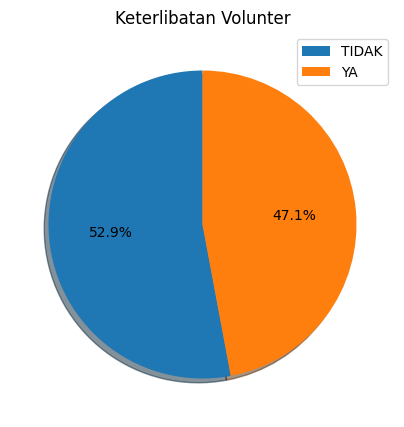

In [346]:
# Membuat Visualisasi Data Keterlibatan keterlibatan_vltr
import matplotlib.pyplot as plt
import seaborn as sns

# Count keterlibatan_vltr Ya dan Tidak
keterlibatan_vltr = df['keterlibatan_vltr'].value_counts()
print(keterlibatan_vltr)

# Membuat Pie Chart
plt.figure(figsize=(5,5))
plt.pie(keterlibatan_vltr, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Keterlibatan Volunter')
plt.legend(keterlibatan_vltr.index)
plt.show()

REGULER      80
KEMITRAAN     5
Name: skema, dtype: int64


Text(0.5, 1.0, 'Skema')

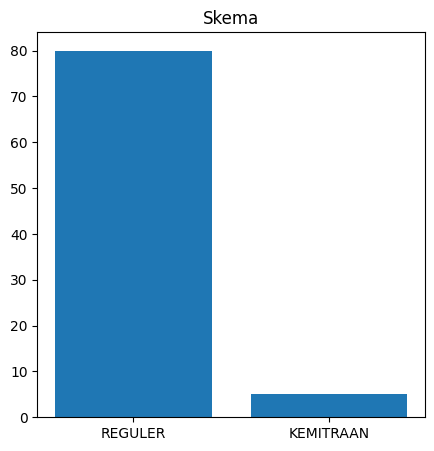

In [347]:
# Membuat Visualisasi Skema Yang di gunakan 
# Count skema
skema = df['skema'].value_counts()
print(skema)

# Membuat Bar Chart
plt.figure(figsize=(5,5))
plt.bar(skema.index, skema)
plt.title('Skema')

Text(0, 0.5, 'Jumlah')

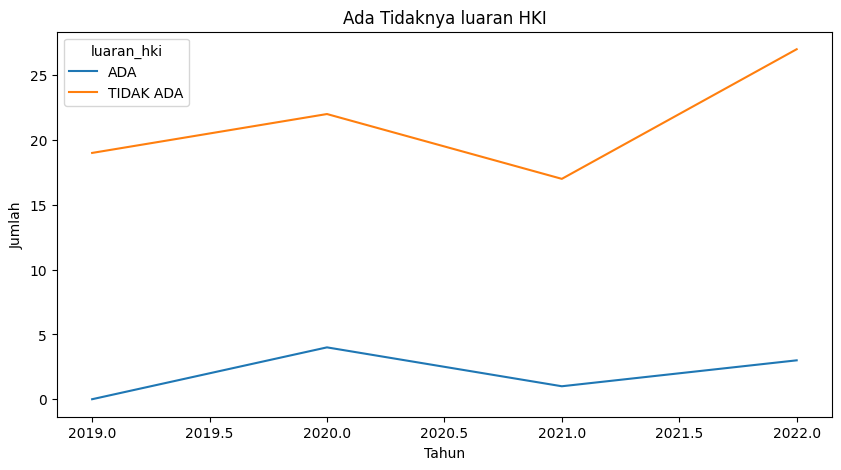

In [348]:
# Visualisasi Ada Tidaknya luaran_hki tiap tahun
luaran_hki = df['luaran_hki']
tahun = df['tahun']

Tabel = pd.crosstab(tahun ,luaran_hki)

# Drop luaran_hki TIDAK ADA
# Tabel = Tabel.drop('TIDAK ADA', axis=1)

Tabel.plot(kind='line', stacked=True, figsize=(10,5))
plt.title('Ada Tidaknya luaran HKI')
plt.xlabel('Tahun')
plt.ylabel('Jumlah')

Text(0, 0.5, 'Tahun\n')

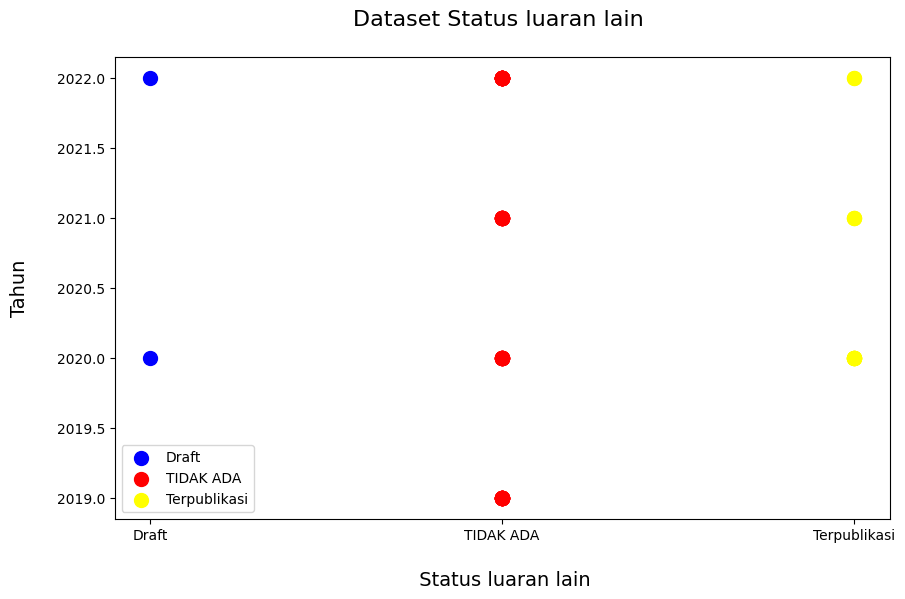

In [349]:
import seaborn as sns

statusIuranLain = df['status_luaran_lain']
tahun = df['tahun']

fig, ax = plt.subplots(figsize=(10, 6))

df_group = df.groupby('status_luaran_lain')
colors = {'TIDAK ADA':'red', 'Terpublikasi':'yellow', 'Draft':'blue'}

# create scatter plot
for name, group in df_group:
    group.plot(ax=ax, kind='scatter', x='status_luaran_lain', y='tahun',label=name, s=100, color=colors[name])  # type: ignore

plt.title('Dataset Status luaran lain \n', size=16)
plt.xlabel('\n Status luaran lain', size=14)
plt.ylabel('Tahun\n', size=14)

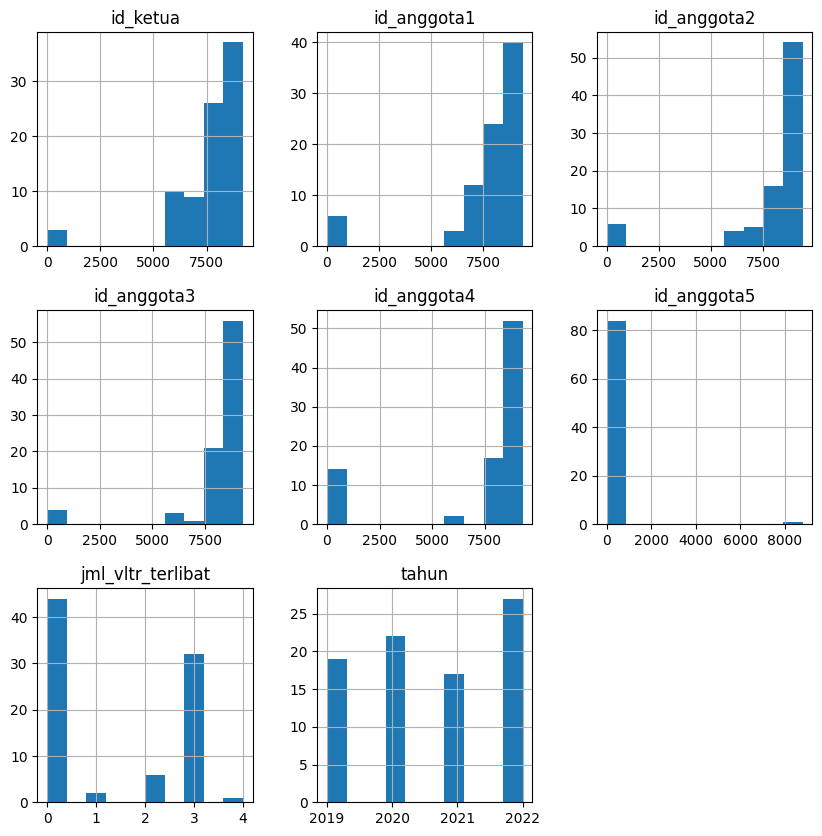

In [350]:
df.hist(figsize=(10,10))
plt.show()


### 2. Lakukan pemilahan data training dan testing yang sesuai dan proporsional dari data tersebut

In [351]:
# Melakukan Pemilahan data Training dan Testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['skema']=encoder.fit_transform(df['skema'])
df['luaran_hki']=encoder.fit_transform(df['luaran_hki'])
df['jenis_luaran_hki']=encoder.fit_transform(df['jenis_luaran_hki'])
df['potensi_hki']=encoder.fit_transform(df['potensi_hki'])
df['luaran_lain']=encoder.fit_transform(df['luaran_lain'])
df['jenis_luaran_lain']=encoder.fit_transform(df['jenis_luaran_lain'])
df['status_luaran_lain']=encoder.fit_transform(df['status_luaran_lain'])
df['keterlibatan_vltr']=encoder.fit_transform(df['keterlibatan_vltr'])

X = df.drop(['keterlibatan_vltr'], axis=1)
y = df['keterlibatan_vltr']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melakukan Normalisasi Data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### 3 Tentukan data validasi!

In [352]:
# Implementasi k-fold cross validation stratified dengan data training, validation, dan testing
from sklearn.model_selection import train_test_split, StratifiedKFold

# Split train test
# Rasio 8:2
df_train2, df_test2 = train_test_split(df, test_size=0.2, random_state=0)

# inisiasi obyek StratifiedKFold
# dengan data df_train2
skf2 = StratifiedKFold(n_splits=4)
print(f'Jumlah fold: {skf2.get_n_splits()}')
print(f'Obyek SKFold: {skf2}')

# Lakukan splitting dengan SKFold
# parameter kedua dari split adalah labelnya
# Split train menjadi train dan validasi
skf2_split = skf2.split(df_train2, df_train2['keterlibatan_vltr'])
print(f'Jumlah data df: {len(df_train2)}')

# cek index data tiap fold
for train_index, test_index in skf2_split:
    print(f'Index train: {train_index} | Index test:{test_index}')

Jumlah fold: 4
Obyek SKFold: StratifiedKFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 68
Index train: [17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 31 32 33 35 36 37 39
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[17 18 19 20 21 22 23 24 25 26 27 28 29 30 34 38 40]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 34 38 40 50 52 53 54 55 56 57 58 59 60 61 62 63 64
 65 66 67] | Index test:[31 32 33 35 36 37 39 41 42 43 44 45 46 47 48 49 51]
Index train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 51] | Index test

### 4. Terapkan dua jenis metode klasifikasi dan lakukan perbandingan akurasi  dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan! 

In [391]:
# Meneraplkan Dua Jenis Algoritma Klasifikasi
# 1. KNN
# 2. Random Forest

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print('KKN')
print('Akurasi Score : ',accuracy_score(y_test, pred))

# Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

print('Random Forest')
print('Akurasi Score : ',accuracy_score(y_test, rfc_pred))

# Melakukan Perbandingan antara KNN dan Random Forest
print('Perbandingan antara KNN dan Random Forest : ',(accuracy_score(y_test, pred)-accuracy_score(y_test, rfc_pred)))

KKN
Akurasi Score :  0.8235294117647058
Random Forest
Akurasi Score :  0.9411764705882353
Perbandingan antara KNN dan Random Forest :  -0.11764705882352944


### 5. Terapkan sebuah metode prediksi (berdasarkan tahun, misal: jumlah kegiatan pada tahun tertentu sebagai x dan jumlah  luaran sebagai y) serta hitung akurasinya dengan wajib melibatkan variabel keterlibatan volunteer sampai variabel luaran-luaran yang dihasilkan!

In [390]:
# Terapkan Sebuah Metode Prediksi Berdasarkan Tahun 
# Membuat Prediksi Keterlibatan Volunter

tahun = 2020
prediksi = df[df['tahun'] == tahun]
prediksi = prediksi.drop(['keterlibatan_vltr'], axis=1)

prediksi = scaler.transform(prediksi)
prediksi = rfc.predict(prediksi)

# Menampilkan Hasil Prediksi dan decode prediksi
print('Prediksi Keterlibatan Volunter pada Tahun',tahun,'adalah',encoder.inverse_transform(prediksi))

# Hitung Akurasi Prediksi
from sklearn.metrics import accuracy_score
print('Akurasi Prediksi : ',accuracy_score(y_test, rfc_pred))



Prediksi Keterlibatan Volunter pada Tahun 2020 adalah ['YA' 'TIDAK' 'YA' 'YA' 'YA' 'TIDAK' 'YA' 'YA' 'YA' 'TIDAK' 'YA' 'YA'
 'TIDAK' 'YA' 'YA' 'YA' 'TIDAK' 'YA' 'TIDAK' 'YA' 'TIDAK' 'YA']
Akurasi Prediksi :  1.0


### 6. Buat Confusion Matrix dan ROC berdasarkan klasifikasi yang diterapkan pada nomor 4!

Confusion Matrix KNN :  [[8 0]
 [3 6]]
Confusion Matrix Random Forest :  [[8 0]
 [0 9]]
ROC KNN :  0.8333333333333333
ROC Random Forest :  1.0
Confusion Matrix KNN


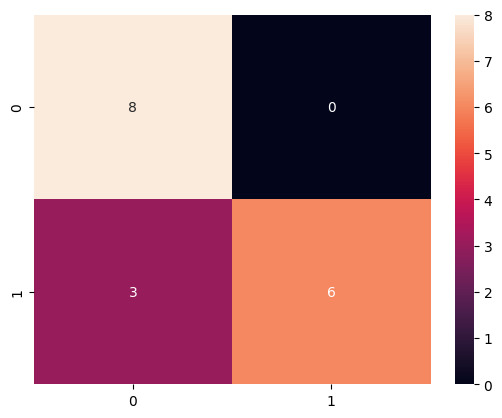

Confusion Matrix Random Forest


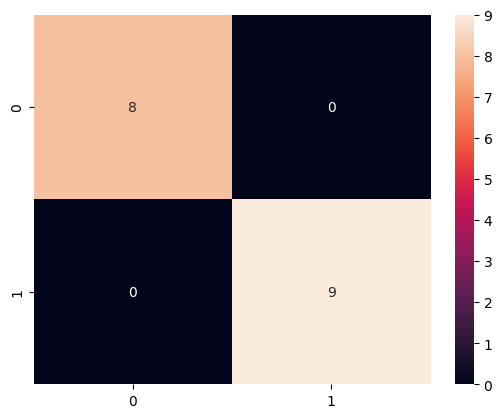

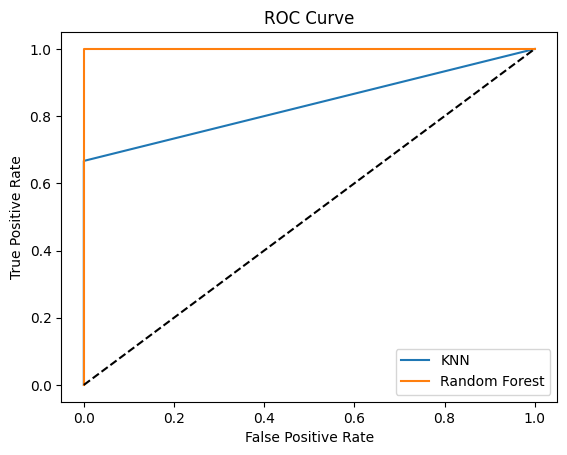

In [376]:
# Membuat Confusion Matrix dan ROC AUC dari KNN dan Random Forest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

# KNN
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

# Random Forest
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

# Confusion Matrix
print('Confusion Matrix KNN : ',confusion_matrix(y_test, pred))
print('Confusion Matrix Random Forest : ',confusion_matrix(y_test, rfc_pred))

# ROC
print('ROC KNN : ',roc_auc_score(y_test, pred))
print('ROC Random Forest : ',roc_auc_score(y_test, rfc_pred))


# Membuat Visualisasi Confusion Matrix dan ROC
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix
print('Confusion Matrix KNN')
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.show()

print('Confusion Matrix Random Forest')
cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(cm, annot=True)
plt.show()

# ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, pred)
fpr2, tpr2, thresholds2 = roc_curve(y_test, rfc_pred)
plt.plot(fpr, tpr, label='KNN')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

### 7. Lakukan hyperparameter tunning berdasarkan jawaban nomor 2, 3, dan 4 menggunakan metode Grid Search, Random Search, dan Exhausive Search!

In [365]:
# lakukan hyperparameter tuning Menggunakan Metode GridSearchCV,RandomizedSearchCV,ExhaustiveSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# GridSearchCV
# Mencari parameter terbaik untuk Random Forest
param_grid = {    
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': list(range(5,10))
    }

grid = GridSearchCV(RandomForestClassifier(),param_grid,refit=True,cv=skf2)
grid.fit(X_train, y_train)

%timeit grid.fit(X, y)

# Evaluasi dengan score
score = grid.score(X,y)

print('Random Forest')
print('GridSearchCV')
print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {grid.best_params_}')


6.55 s ± 97.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest
GridSearchCV
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'criterion': 'gini', 'max_depth': 6}


In [369]:
# RandomizedSearchCV
# Mencari parameter terbaik untuk Random Forest
param_grid = {
    'bootstrap': [True, False],
    'random_state': [42, 43, 44, 45, 46, 47, 48, 49, 50],
    'max_depth': [60,70,80, 90],
}

random = RandomizedSearchCV(RandomForestClassifier(),param_grid,refit=True,cv=skf2,scoring='accuracy')
random.fit(X_train, y_train)

%timeit random.fit(X, y)

# Evaluasi dengan score
score = random.score(X,y)

print('Random Forest')
print('RandomizedSearchCV')
print(f'Hasil evaluasi: {score}')
print(f'Konfigurasi hyperparameter: {random.best_params_}')

4.89 s ± 1.09 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
Random Forest
RandomizedSearchCV
Hasil evaluasi: 1.0
Konfigurasi hyperparameter: {'random_state': 50, 'max_depth': 90, 'bootstrap': False}


### 8.Tambahkan visualisasi berdasarkan nomor 4 dan 5 (masing-masing nomor minimal satu visualisasi)!

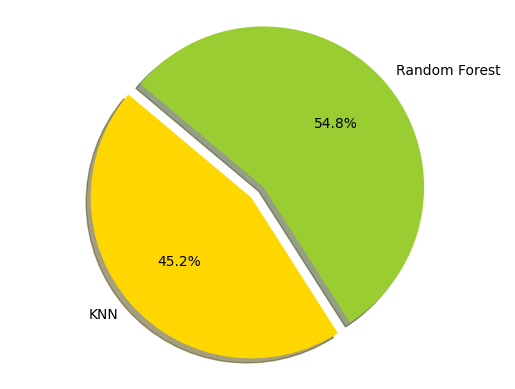

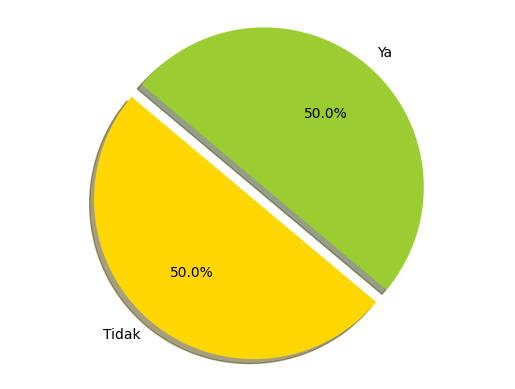

In [389]:
# Membuat Visualisasi Perbandingan antara KNN dan Random Forest
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'KNN', 'Random Forest'
sizes = [accuracy_score(y_test, pred), accuracy_score(y_test, rfc_pred)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


# Visualisasi Hasil Prediksi
import matplotlib.pyplot as plt
import numpy as np

# Data to plot
labels = 'Tidak', 'Ya'
sizes = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, rfc_pred)]
colors = ['gold', 'yellowgreen']
explode = (0.1, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()